# US visa application analysis

# 1 -- Data preprocessing

## 1.1 -- Data import

In [31]:
# read the csv file using pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
%matplotlib inline

data = pd.read_csv("us_perm_visas.csv")

c:\users\heath\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1.2 -- Data overview
In total, there are 374362 applications in this file.  
For each of them there are 154 features.

In [2]:
# original data size
# rows: 374362
# columns: 154
data.shape

(374362, 154)

In [3]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)

In [4]:
data

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,country_of_citzenship,decision_date,employer_address_1,employer_address_2,employer_city,employer_country,employer_decl_info_title,employer_name,employer_num_employees,employer_phone,employer_phone_ext,employer_postal_code,employer_state,employer_yr_estab,foreign_worker_info_alt_edu_experience,foreign_worker_info_birth_country,foreign_worker_info_city,foreign_worker_info_education,foreign_worker_info_education_other,foreign_worker_info_inst,foreign_worker_info_major,foreign_worker_info_postal_code,foreign_worker_info_rel_occup_exp,foreign_worker_info_req_experience,foreign_worker_info_state,foreign_worker_info_training_comp,foreign_worker_ownership_interest,foreign_worker_yr_rel_edu_completed,fw_info_alt_edu_experience,fw_info_birth_country,fw_info_education_other,fw_info_postal_code,fw_info_rel_occup_exp,fw_info_req_experience,fw_info_training_comp,fw_info_yr_rel_edu_completed,fw_ownership_interest,ji_foreign_worker_live_on_premises,ji_fw_live_on_premises,ji_live_in_dom_svc_contract,ji_live_in_domestic_service,ji_offered_to_sec_j_foreign_worker,ji_offered_to_sec_j_fw,job_info_alt_cmb_ed_oth_yrs,job_info_alt_combo_ed,job_info_alt_combo_ed_exp,job_info_alt_combo_ed_other,job_info_alt_field,job_info_alt_field_name,job_info_alt_occ,job_info_alt_occ_job_title,job_info_alt_occ_num_months,job_info_combo_occupation,job_info_education,job_info_education_other,job_info_experience,job_info_experience_num_months,job_info_foreign_ed,job_info_foreign_lang_req,job_info_job_req_normal,job_info_job_title,job_info_major,job_info_training,job_info_training_field,job_info_training_num_months,job_info_work_city,job_info_work_postal_code,job_info_work_state,naics_2007_us_code,naics_2007_us_title,naics_code,naics_title,naics_us_code,naics_us_code_2007,naics_us_title,naics_us_title_2007,orig_case_no,orig_file_date,preparer_info_emp_completed,preparer_info_title,pw_amount_9089,pw_determ_date,pw_expire_date,pw_job_title_908,pw_job_title_9089,pw_level_9089,pw_soc_code,pw_soc_title,pw_source_name_9089,pw_source_name_other_9089,pw_track_num,pw_unit_of_pay_9089,rec_info_barg_rep_notified,recr_info_barg_rep_notified,recr_info_coll_teach_comp_proc,recr_info_coll_univ_teacher,recr_info_employer_rec_payment,recr_info_first_ad_start,recr_info_job_fair_from,recr_info_job_fair_to,recr_info_on_campus_recr_from,recr_info_on_campus_recr_to,recr_info_pro_org_advert_from,recr_info_pro_org_advert_to,recr_info_prof_org_advert_from,recr_info_prof_org_advert_to,recr_info_professional_occ,recr_info_radio_tv_ad_from,recr_info_radio_tv_ad_to,recr_info_second_ad_start,recr_info_sunday_newspaper,recr_info_swa_job_order_end,recr_info_swa_job_order_start,refile,ri_1st_ad_newspaper_name,ri_2nd_ad_newspaper_name,ri_2nd_ad_newspaper_or_journal,ri_campus_placement_from,ri_campus_placement_to,ri_coll_tch_basic_process,ri_coll_teach_pro_jnl,ri_coll_teach_select_date,ri_employee_referral_prog_from,ri_employee_referral_prog_to,ri_employer_web_post_from,ri_employer_web_post_to,ri_job_search_website_from,ri_job_search_website_to,ri_layoff_in_past_six_months,ri_local_ethnic_paper_from,ri_local_ethnic_paper_to,ri_posted_notice_at_worksite,ri_pvt_employment_firm_from,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,NaN,ARMENIA,2012-02-01,24 WEST 25 STREET,5TH FLOOR,NEW YORK,NaN,NaN,NETSOFT USA INC.,NaN,NaN,NaN,10010,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York,NaN,NY,541512,Computer Systems Design Services,Na

# 2 -- Data Analysis

## 2.1 -- Case status Distribution and Cleaning

In [5]:
# Count the number of each different case status
for value in data.case_status.unique():
    print(len(data[data['case_status'] == value]),"of status '{}'".format(value))

181933 of status 'Certified'
25649 of status 'Denied'
148586 of status 'Certified-Expired'
18194 of status 'Withdrawn'


Text(0.5,1,'Case status Distribution')

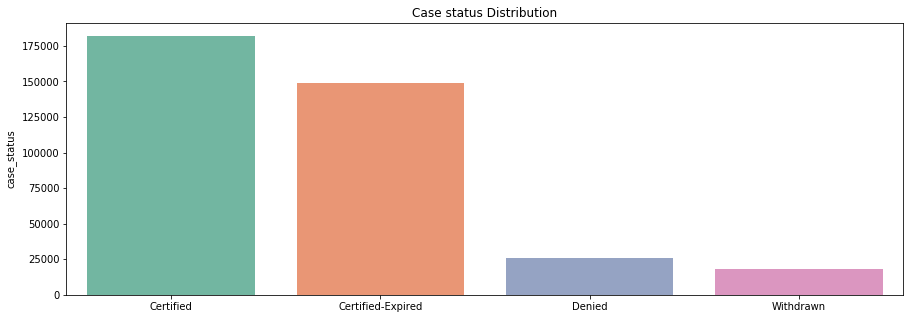

In [6]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x=data['case_status'].value_counts()[:25].index, y=data['case_status'].value_counts()[:25], palette="Set2")
ax.set_title("Case status Distribution")

Since we notice that some of our data have the values **Withdrawn**, to get rid of the noise, we want to drop those data. Additionally, for those **Certified-Expired**, we can equivalently consider them to be **Certified**, so we want to modify our dataset a bit in the following block:

In [7]:
data = data[data["case_status"] != "Withdrawn"]
data.loc[data.case_status == 'Certified-Expired', 'case_status'] = 'Certified'
data.case_status.value_counts()

c:\users\heath\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Certified    330519
Denied        25649
Name: case_status, dtype: int64

Now let's see our cleaned data again:

In [8]:
# Count the number of each different case status
for value in data["case_status"].unique():
    print(len(data[data['case_status'] == value]),"of status '{}'".format(value))

330519 of status 'Certified'
25649 of status 'Denied'


Now we get cleaned data then we can visualize it:

Text(0.5,1,'Case status Distribution')

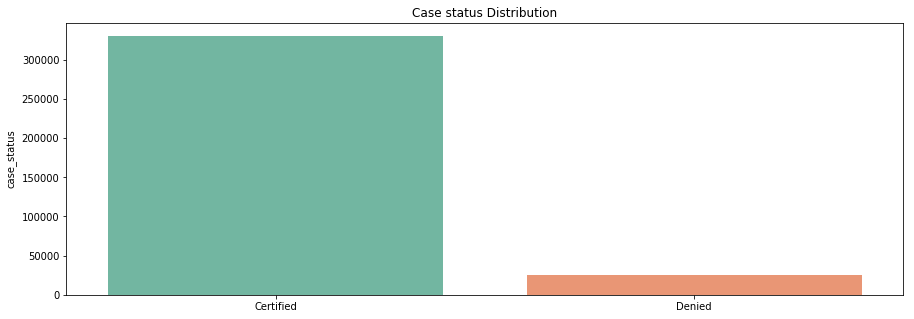

In [9]:
plt.subplots(figsize=(15,5))
ax = sns.barplot(x=data['case_status'].value_counts()[:25].index, y=data['case_status'].value_counts()[:25], palette="Set2")
ax.set_title("Case status Distribution")

## 2.2 -- Certified cases distribution

Since we only need to get the distribution with respect to years, we can first convert the decision date to only containing years.  
In this project, we can create a new column called **year** to store the year.

In [10]:
data['year'] = pd.to_datetime(data['decision_date']).dt.year

c:\users\heath\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Year Distribution')

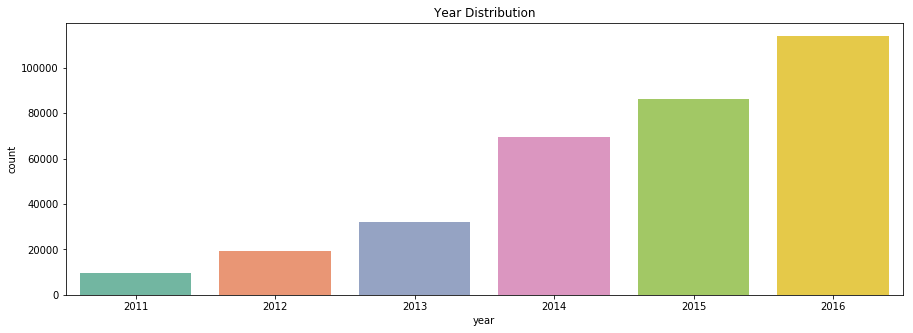

In [11]:
plt.subplots(figsize=(15,5))
ax = sns.countplot(x="year", data=data[data["case_status"]=="Certified"], palette="Set2")
ax.set_title("Year Distribution")

## 2.3 -- Top 10 Countries with High Visa Applications

Text(0.5,1,'Top 10 Countries with High Visa Applications')

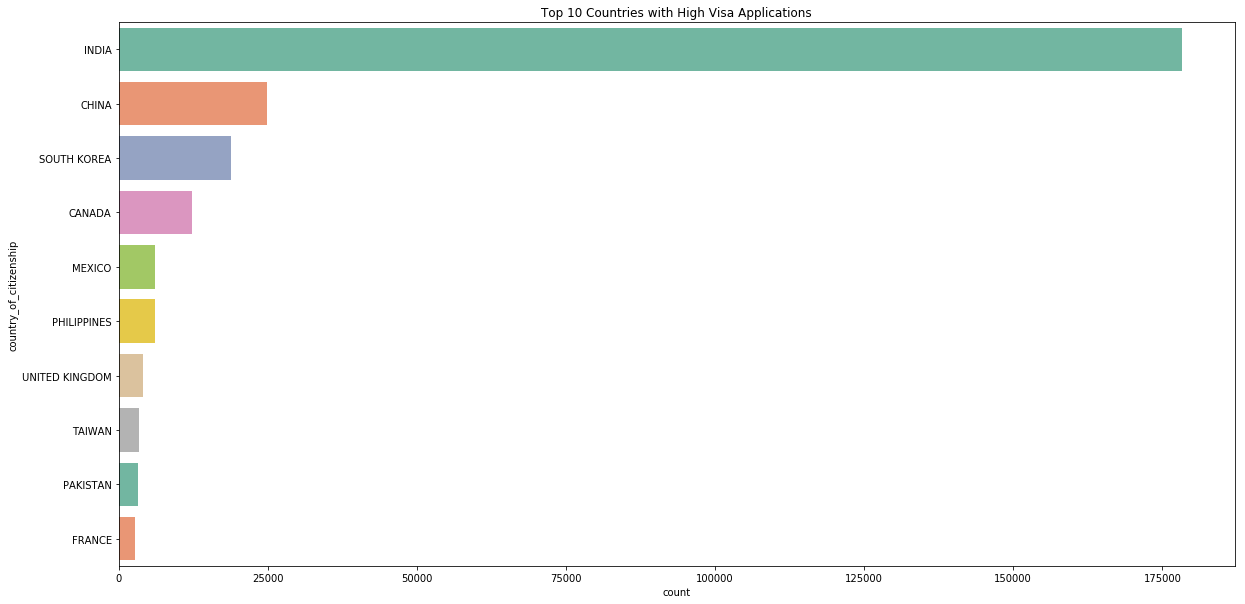

In [12]:
plt.subplots(figsize=(20,10))
ax = sns.countplot(y="country_of_citizenship", data=data[data["case_status"]=="Certified"], order=data["country_of_citizenship"].value_counts().iloc[:10].index, palette="Set2")
ax.set_title("Top 10 Countries with High Visa Applications")

Text(0.5,1,'Top 10 Countries with High Visa Applications')

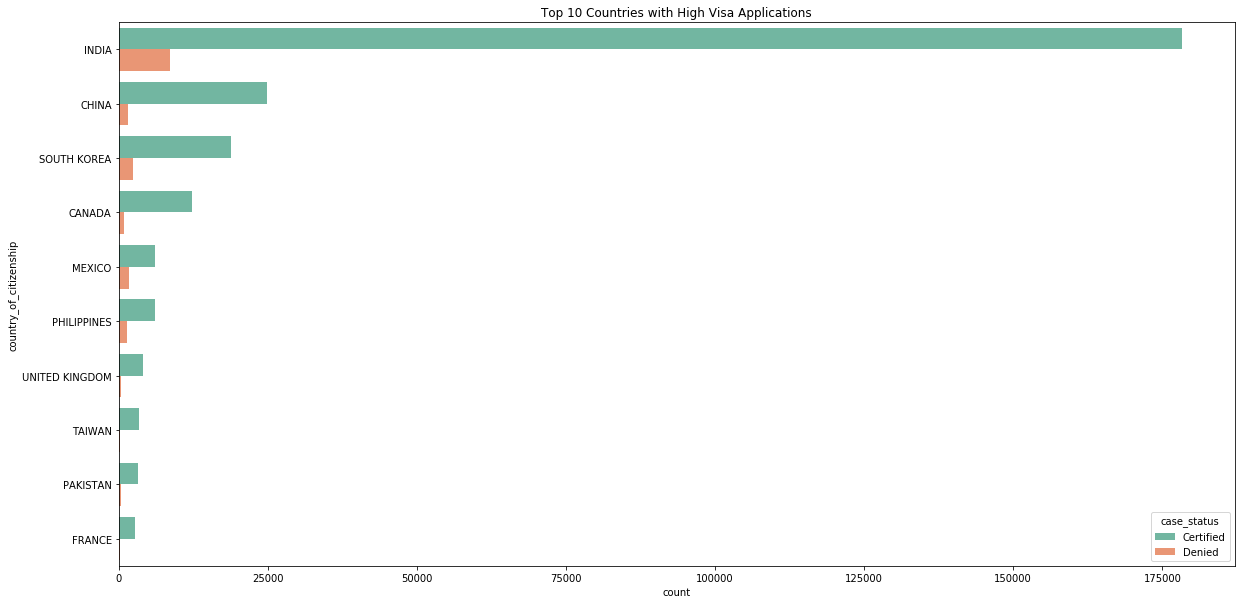

In [13]:
plt.subplots(figsize=(20,10))
ax = sns.countplot(y="country_of_citizenship", data=data, hue="case_status", order=data["country_of_citizenship"].value_counts().iloc[:10].index, palette="Set2")
ax.set_title("Top 10 Countries with High Visa Applications")

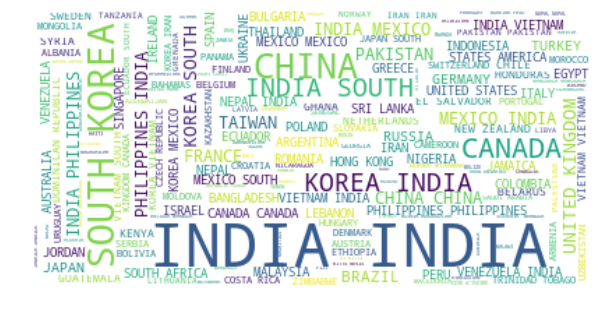

In [62]:
plt.subplots(figsize=(10,8))
text = " ".join(data["country_of_citizenship"].dropna().tolist())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 2.4 -- Top 10 classes of Visa Applications

Text(0.5,1,'Top 10 Classes of Visa Applications')

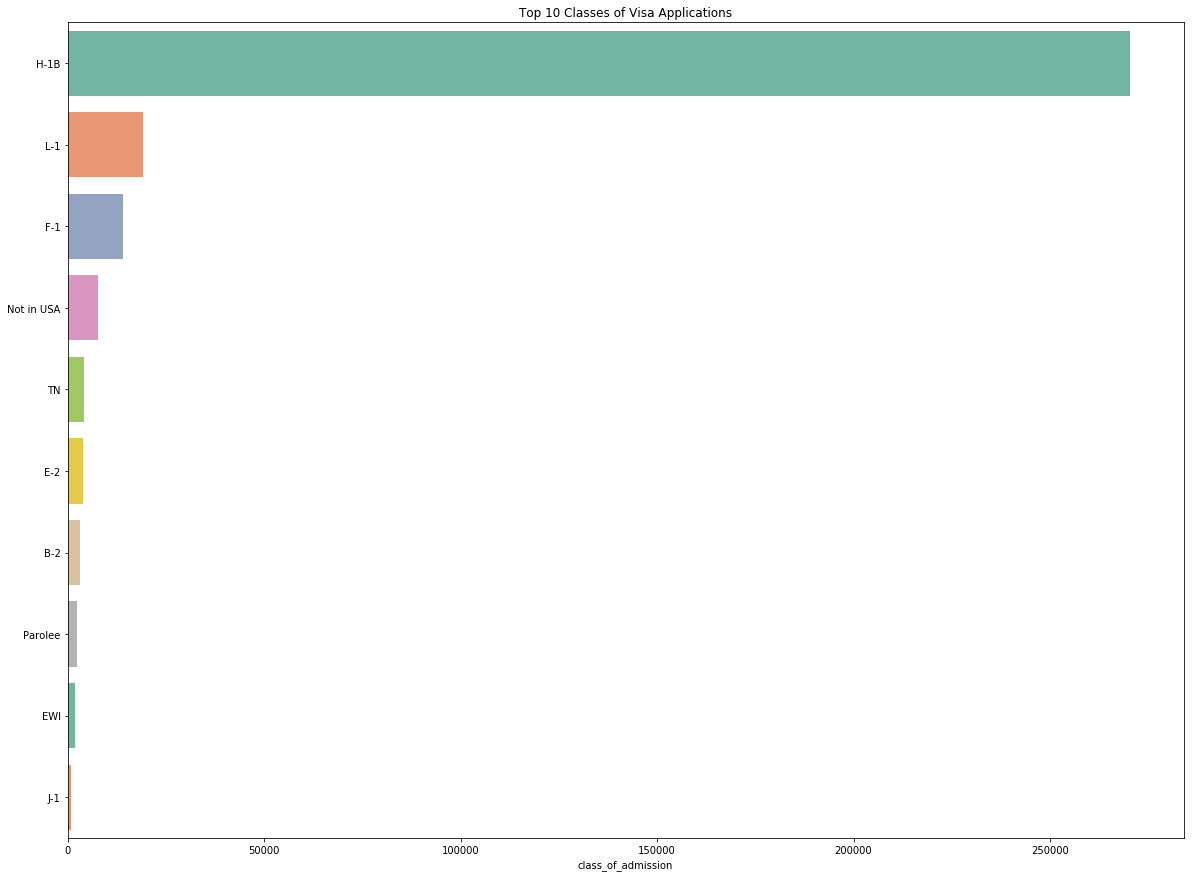

In [14]:
plt.subplots(figsize=(20,15))
ax = sns.barplot(x=data['class_of_admission'].value_counts()[:10], y=data['class_of_admission'].value_counts()[:10].index, palette="Set2")
ax.set_title("Top 10 Classes of Visa Applications")

Text(0.5,1,'Top 10 Classes of Visa Applications')

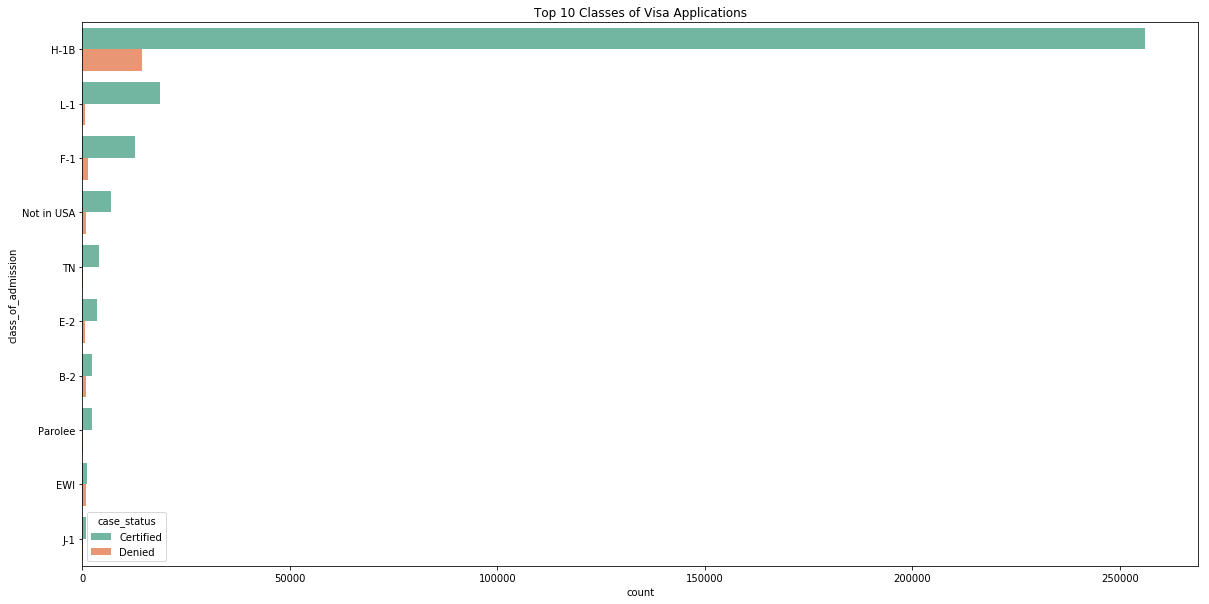

In [15]:
plt.subplots(figsize=(20,10))
ax = sns.countplot(y="class_of_admission", data=data, hue="case_status", order=data["class_of_admission"].value_counts().iloc[:10].index, palette="Set2")
ax.set_title("Top 10 Classes of Visa Applications")

## 2.5 -- Top 20 Employer States with High Visa Applications

Text(0.5,1,'Top 20 Employer States with High Visa Applications')

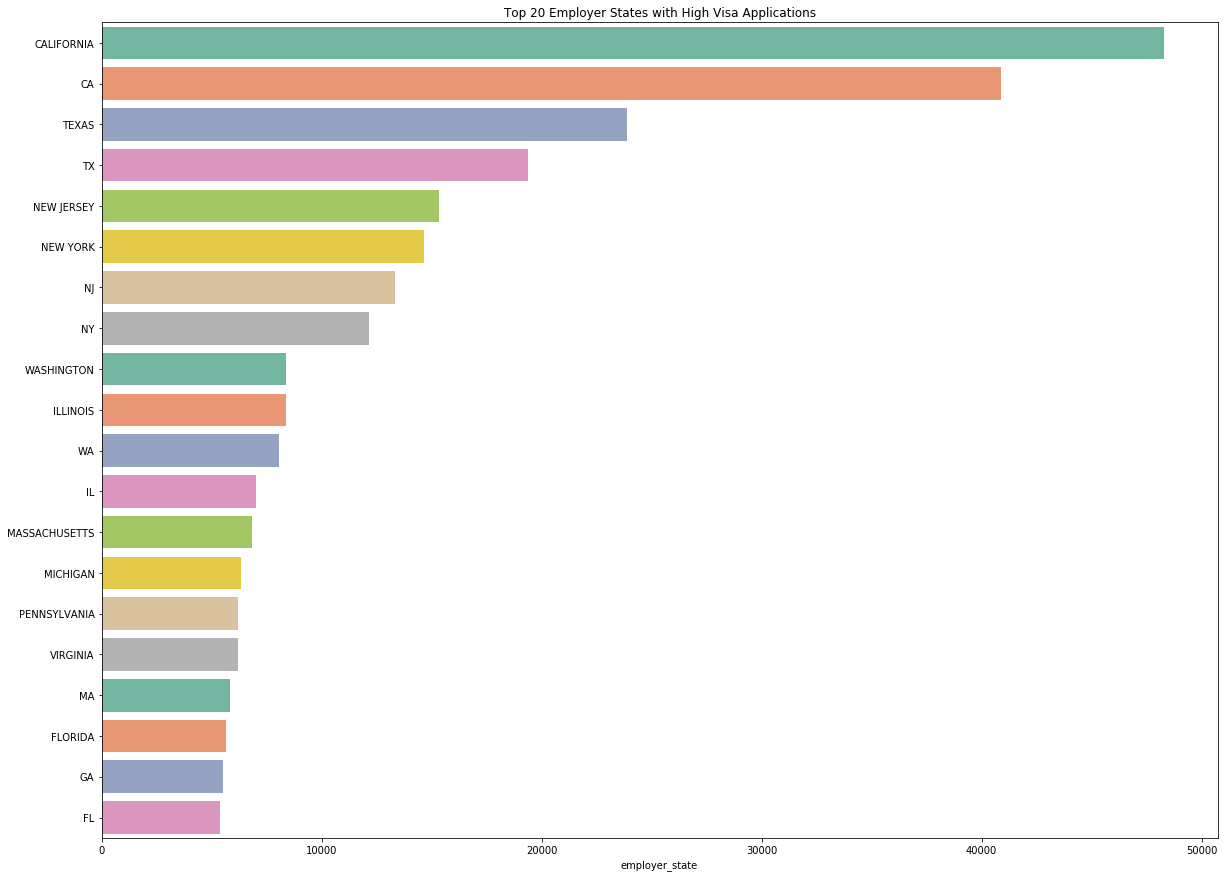

In [18]:
plt.subplots(figsize=(20,15))
ax = sns.barplot(x=data['employer_state'].value_counts()[:20], y=data['employer_state'].value_counts()[:20].index, palette="Set2")
ax.set_title("Top 20 Employer States with High Visa Applications")

Text(0.5,1,'Top 20 Employer States with High Visa Applications')

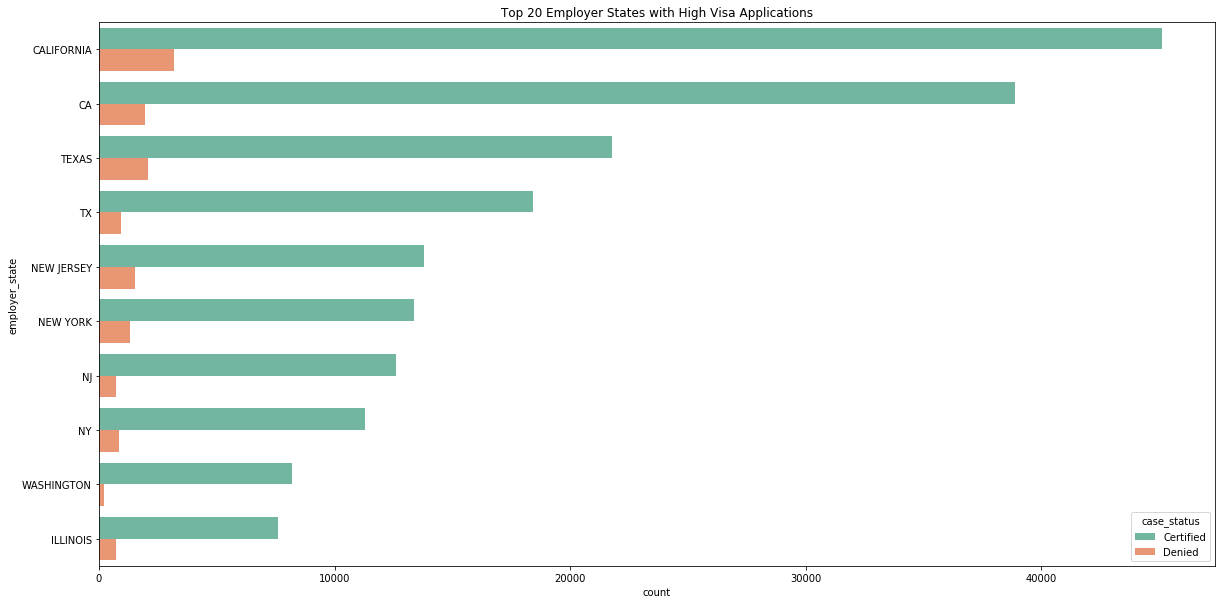

In [19]:
plt.subplots(figsize=(20,10))
ax = sns.countplot(y="employer_state", data=data, hue="case_status", order=data["employer_state"].value_counts().iloc[:10].index, palette="Set2")
ax.set_title("Top 20 Employer States with High Visa Applications")

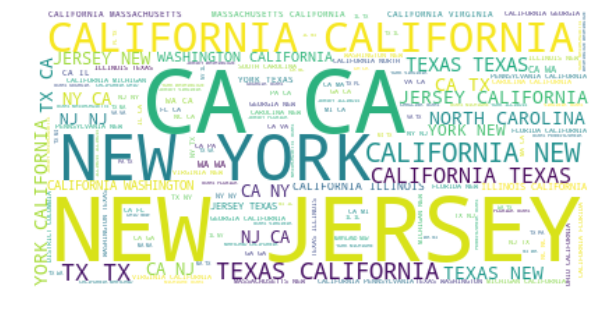

In [61]:
plt.subplots(figsize=(10,8))
text = " ".join(data["employer_state"].dropna().tolist())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 2.6 -- Top 20 Employer Cities with High Visa Applications

Text(0.5,1,'Top 20 Employer Cities with High Visa Applications')

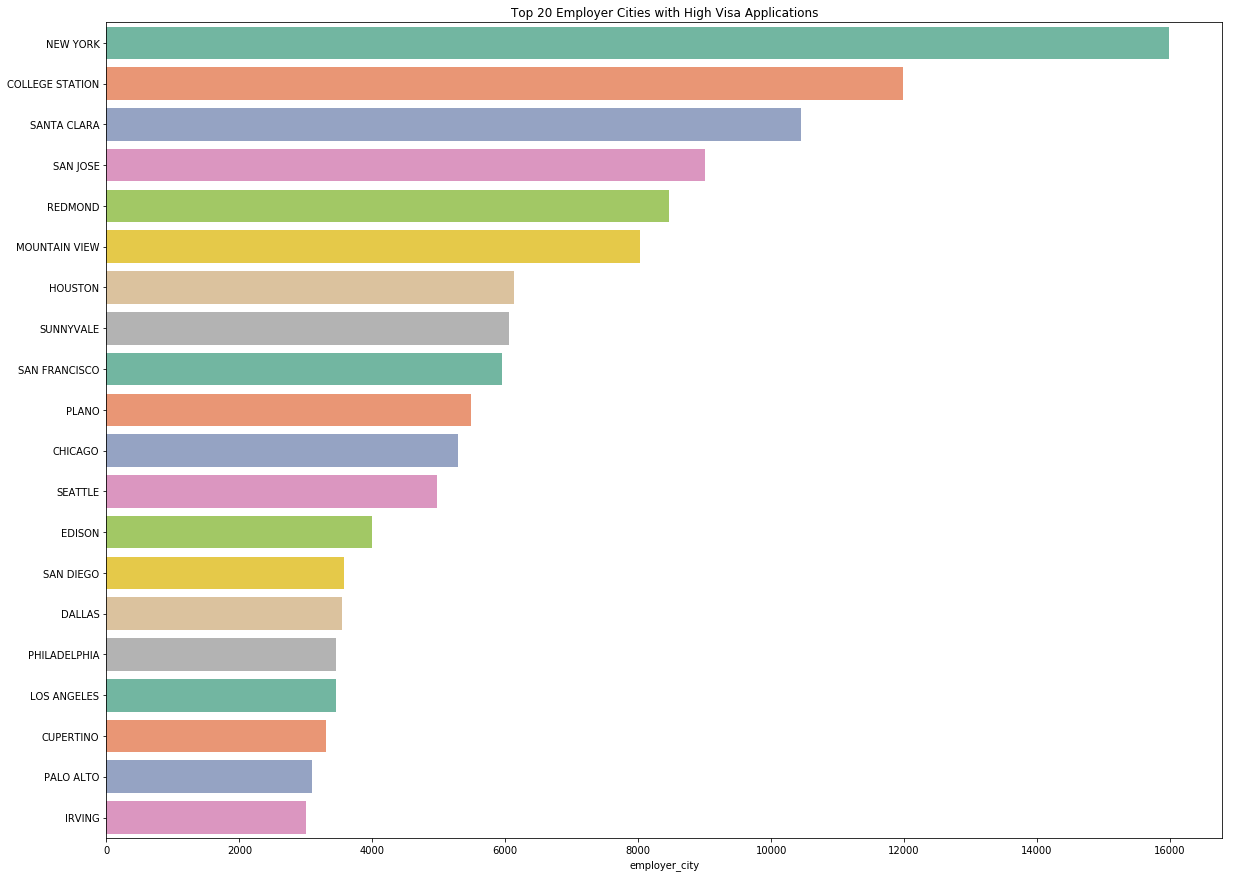

In [16]:
plt.subplots(figsize=(20,15))
ax = sns.barplot(x=data['employer_city'].value_counts()[:20], y=data['employer_city'].value_counts()[:20].index, palette="Set2")
ax.set_title("Top 20 Employer Cities with High Visa Applications")

Text(0.5,1,'Top 20 Employer Cities with High Visa Applications')

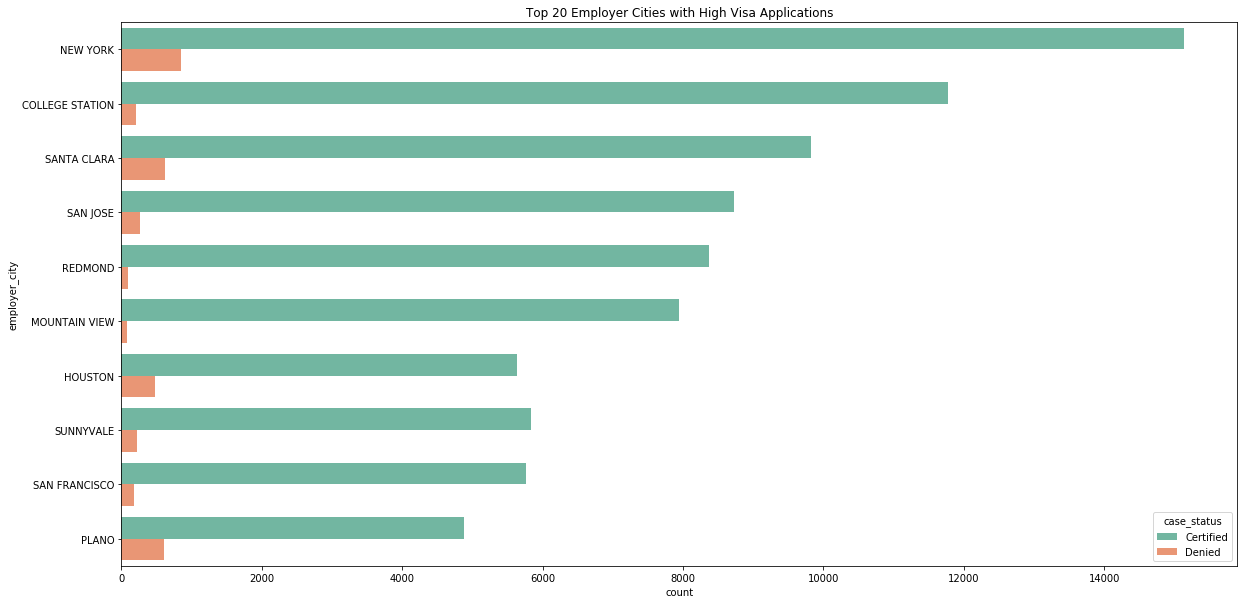

In [17]:
plt.subplots(figsize=(20,10))
ax = sns.countplot(y="employer_city", data=data, hue="case_status", order=data["employer_city"].value_counts().iloc[:10].index, palette="Set2")
ax.set_title("Top 20 Employer Cities with High Visa Applications")

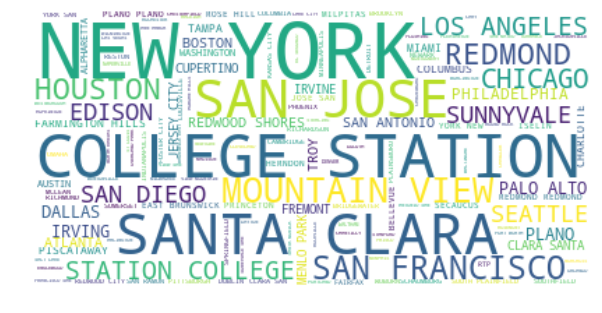

In [63]:
plt.subplots(figsize=(10,8))
text = " ".join(data["employer_city"].dropna().tolist())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 2.7 -- Top 25 Employer Companies with Accepted Visa Applications

Text(0.5,1,'Top 25 Employer Companies with Accepted Visa Applications')

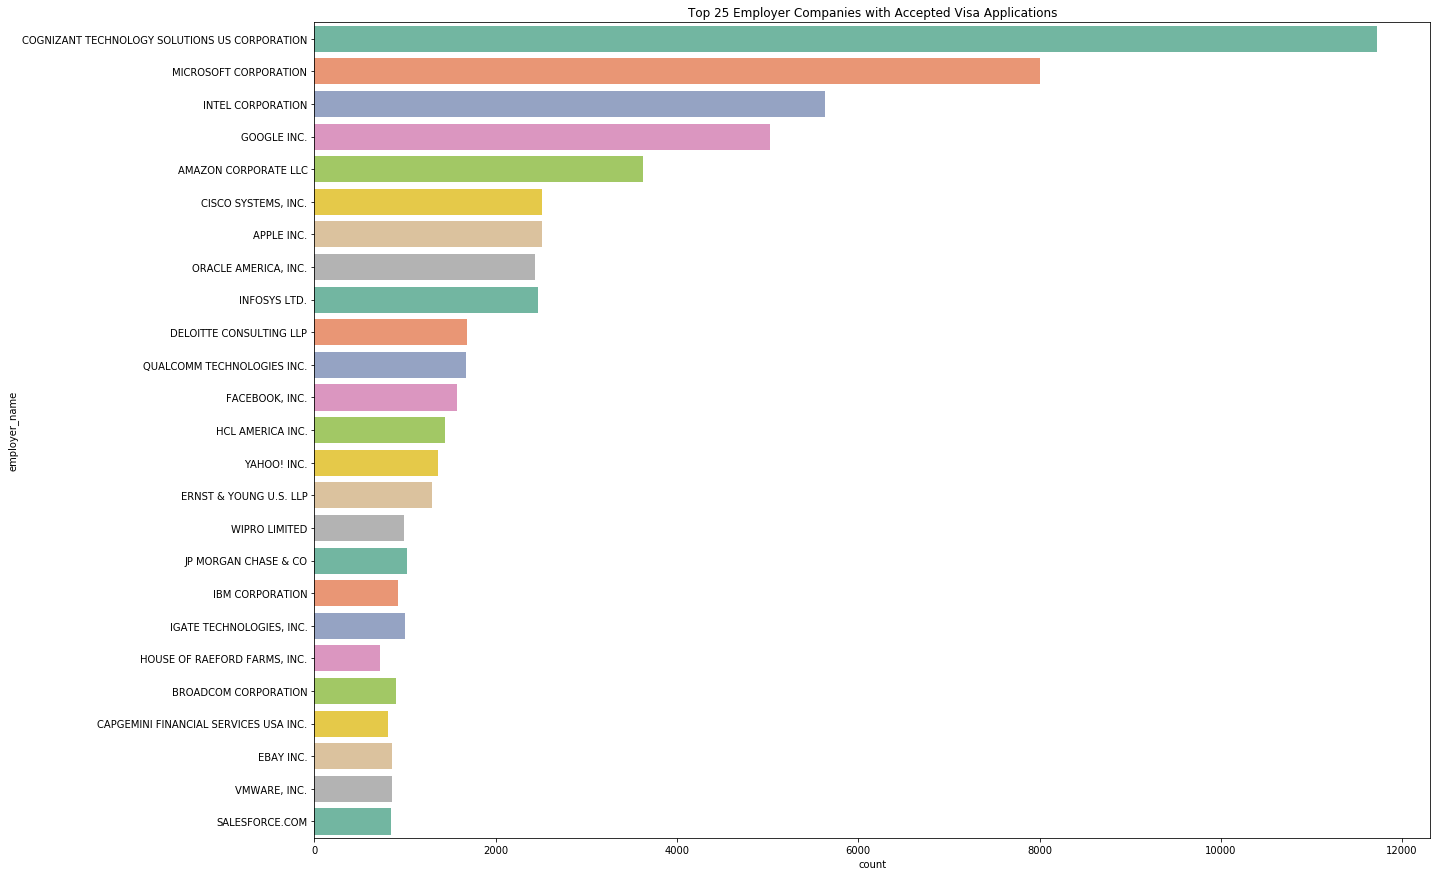

In [20]:
plt.subplots(figsize=(20,15))
ax = sns.countplot(y="employer_name", data=data[data["case_status"]=="Certified"], order=data["employer_name"].value_counts().iloc[:25].index, palette="Set2")
ax.set_title("Top 25 Employer Companies with Accepted Visa Applications")

Text(0.5,1,'Top 25 Employer Companies with Accepted Visa Applications')

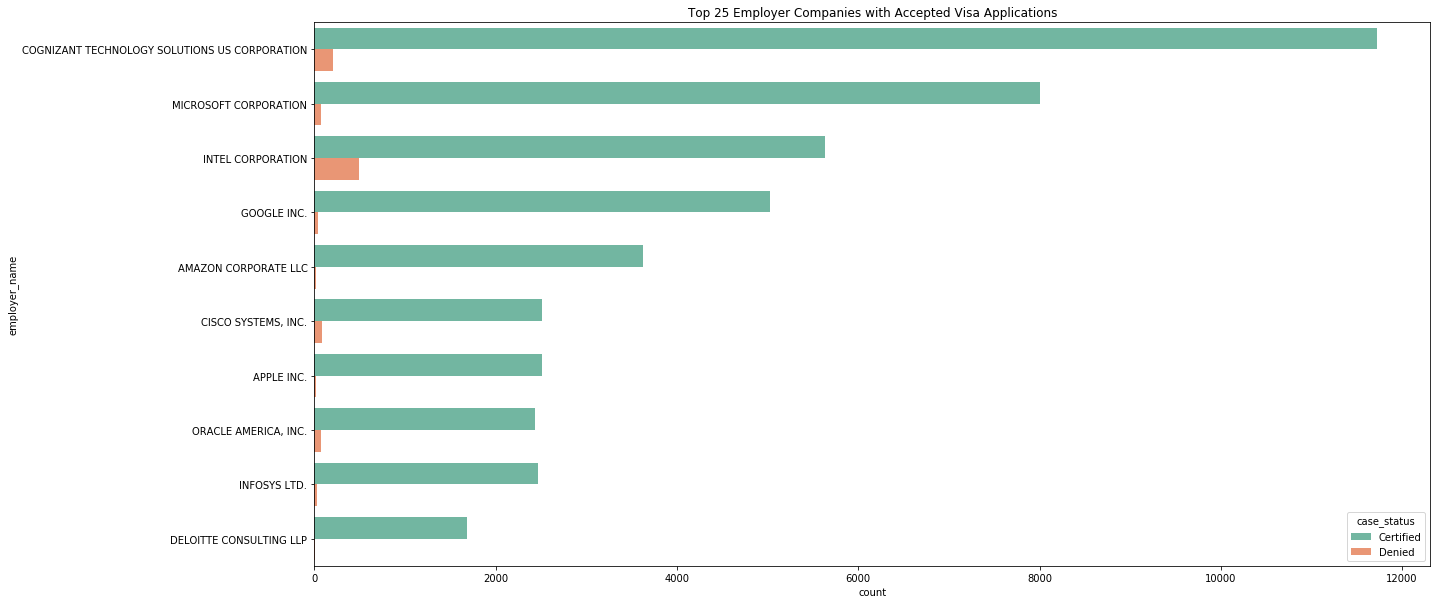

In [21]:
plt.subplots(figsize=(20,10))
ax = sns.countplot(y="employer_name", data=data, hue="case_status", order=data["employer_name"].value_counts().iloc[:10].index, palette="Set2")
ax.set_title("Top 25 Employer Companies with Accepted Visa Applications")

## 2.8 -- Top 20 Economic Sector with High Visa Applications

Text(0.5,1,'Top 20 Economic Sector with High Visa Applications')

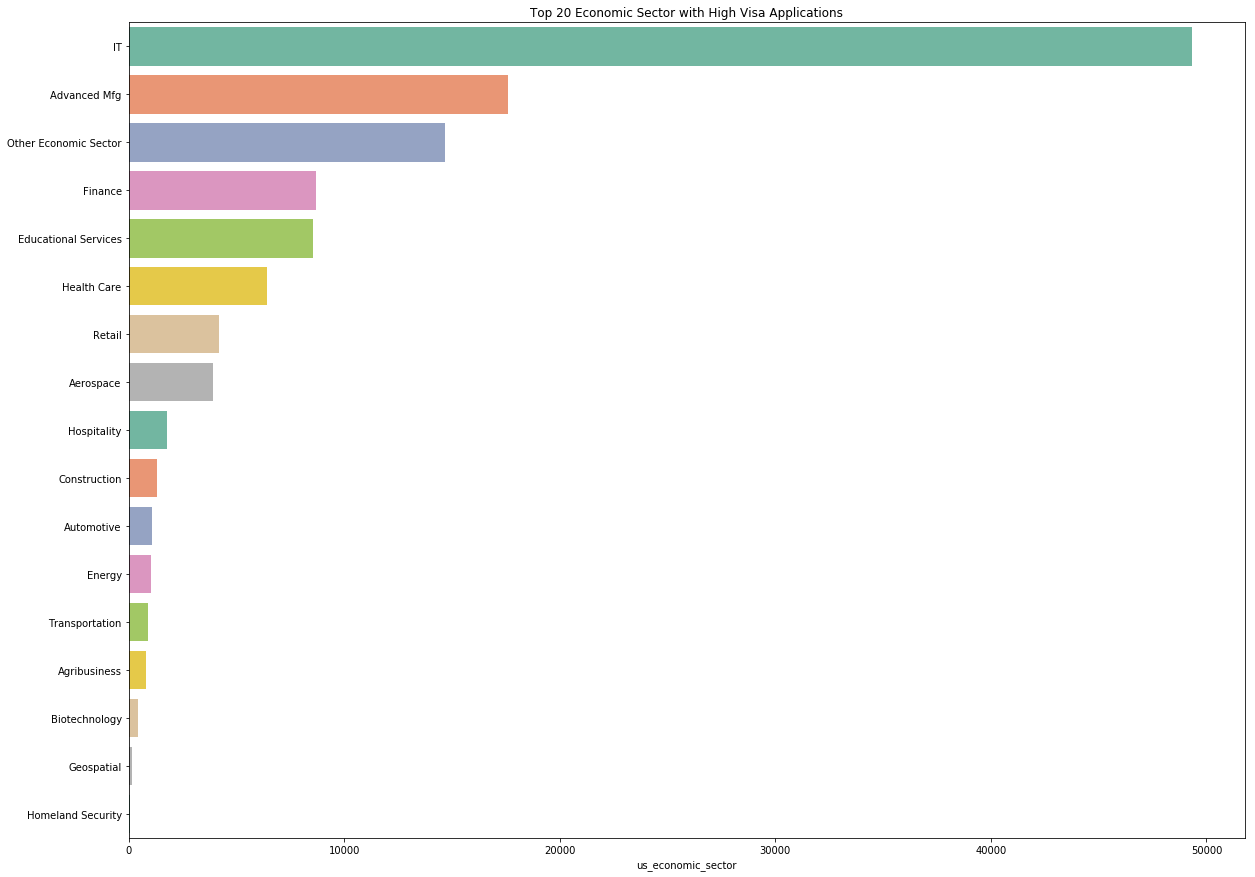

In [22]:
plt.subplots(figsize=(20,15))
ax = sns.barplot(x=data['us_economic_sector'].value_counts()[:20], y=data['us_economic_sector'].value_counts()[:20].index, palette="Set2")
ax.set_title("Top 20 Economic Sector with High Visa Applications")

Text(0.5,1,'Top 20 Economic Sector with High Visa Applications')

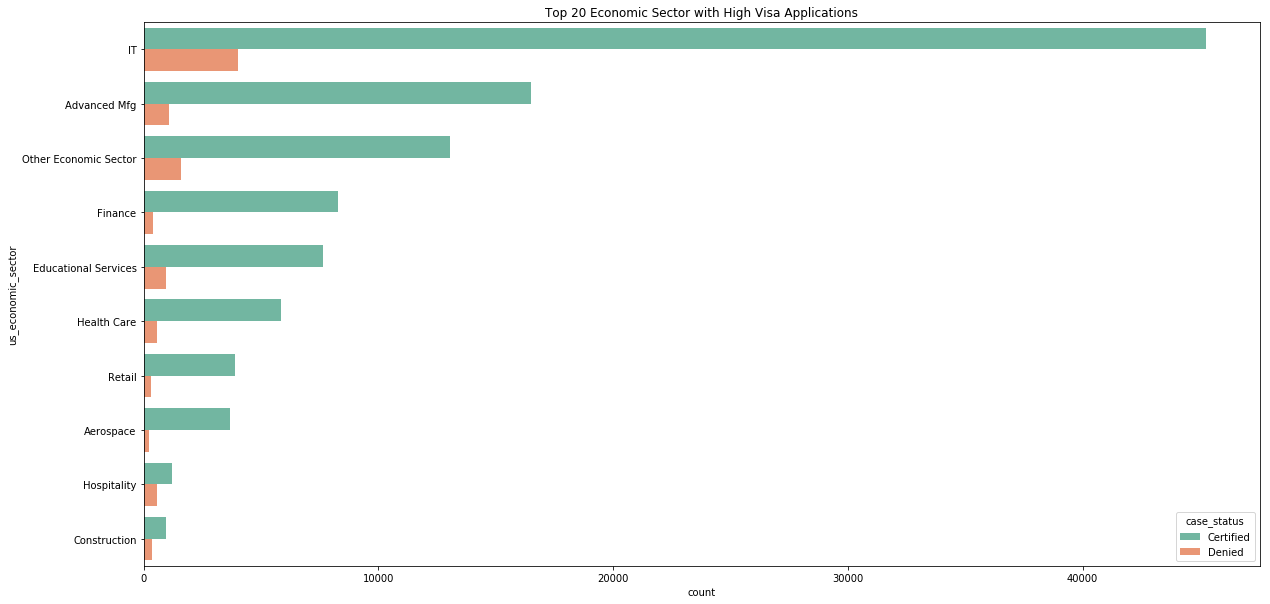

In [23]:
plt.subplots(figsize=(20,10))
ax = sns.countplot(y="us_economic_sector", data=data, hue="case_status", order=data["us_economic_sector"].value_counts().iloc[:10].index, palette="Set2")
ax.set_title("Top 20 Economic Sector with High Visa Applications")

## 2.9 -- Top 20 Major with High Visa Applications

Text(0.5,1,'Top 20 Major with High Visa Applications')

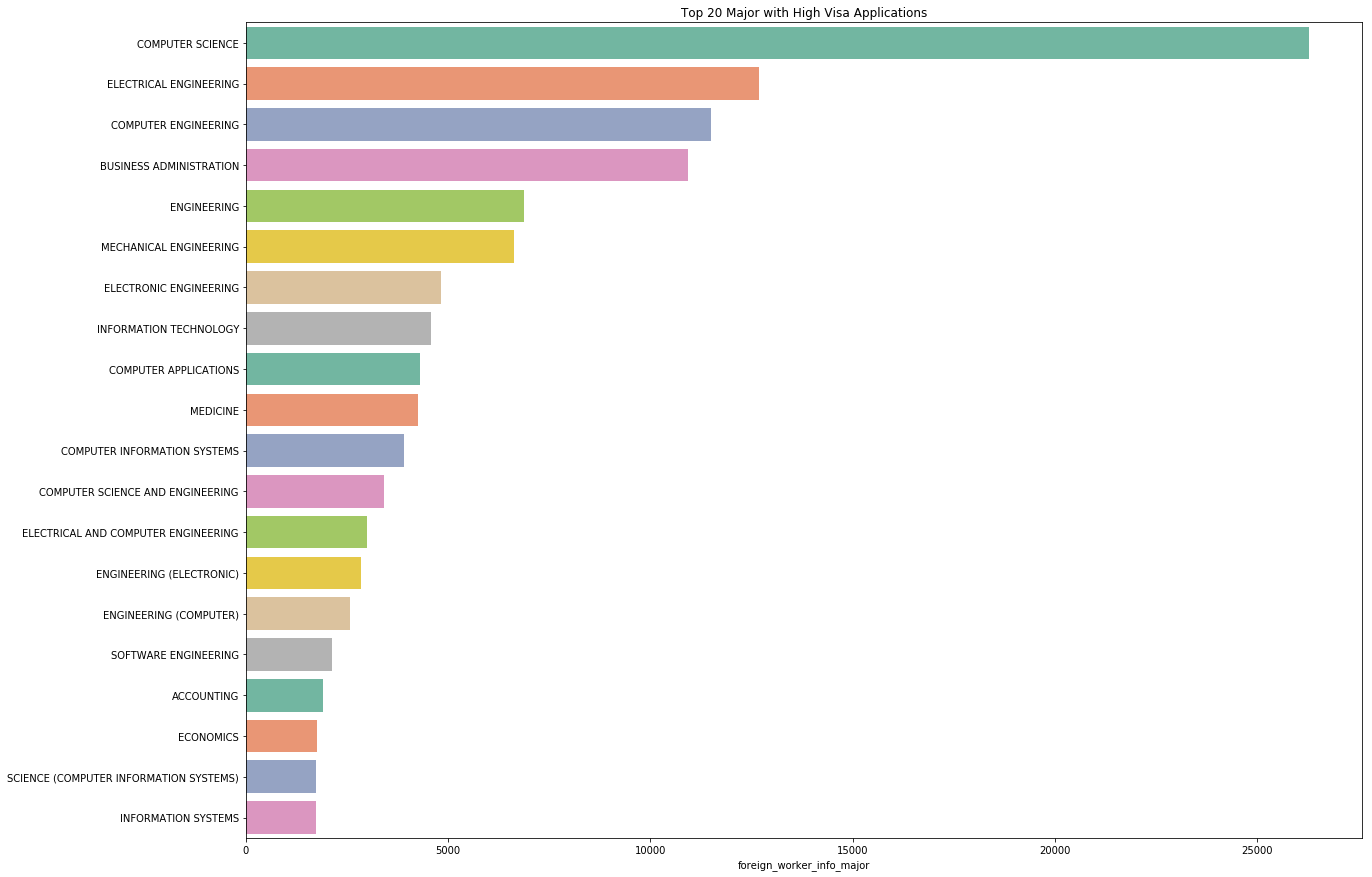

In [25]:
plt.subplots(figsize=(20,15))
ax = sns.barplot(x=data['foreign_worker_info_major'].value_counts()[:20], y=data['foreign_worker_info_major'].value_counts()[:20].index, palette="Set2")
ax.set_title("Top 20 Major with High Visa Applications")

Text(0.5,1,'Top 20 Major with High Visa Applications')

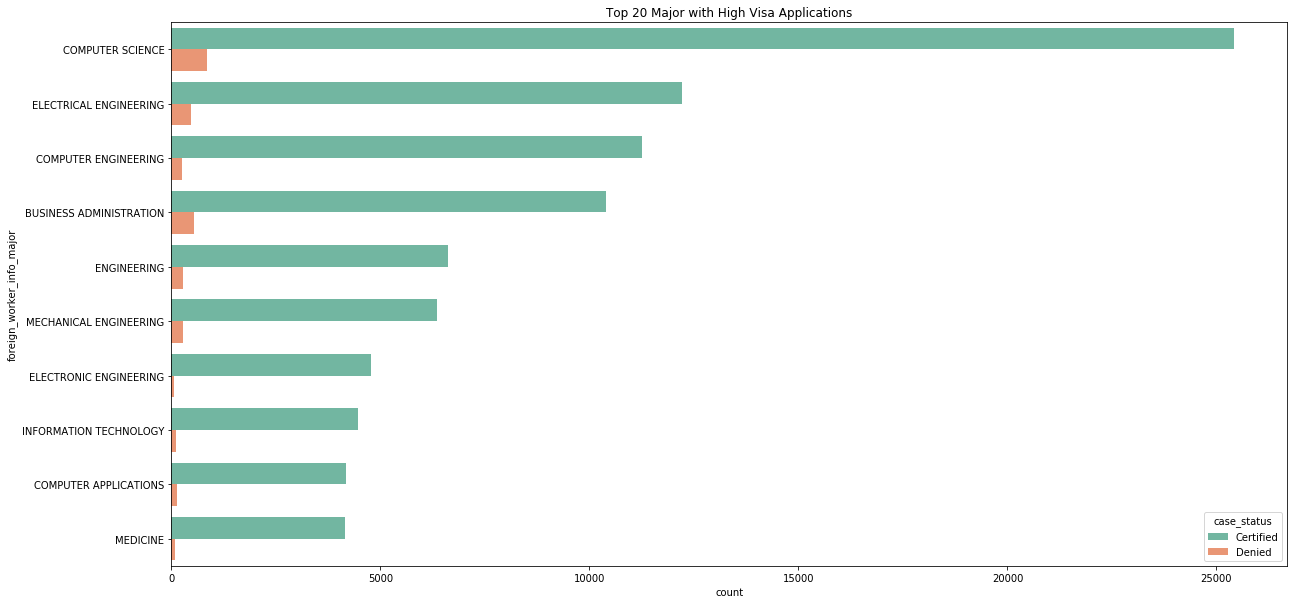

In [24]:
plt.subplots(figsize=(20,10))
ax = sns.countplot(y="foreign_worker_info_major", data=data, hue="case_status", order=data["foreign_worker_info_major"].value_counts().iloc[:10].index, palette="Set2")
ax.set_title("Top 20 Major with High Visa Applications")

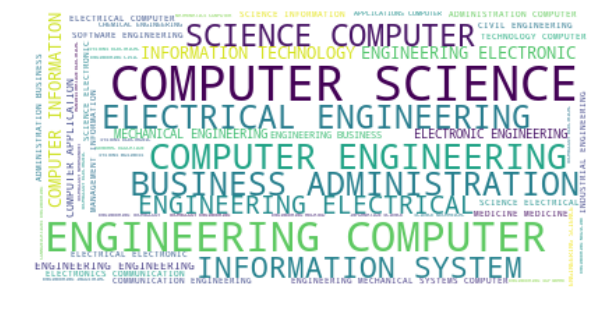

In [65]:
plt.subplots(figsize=(10,8))
text = " ".join(data["foreign_worker_info_major"].dropna().tolist())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 2.10 -- Top Educations with High Applications

Text(0.5,1,'Top Educations with High Applications')

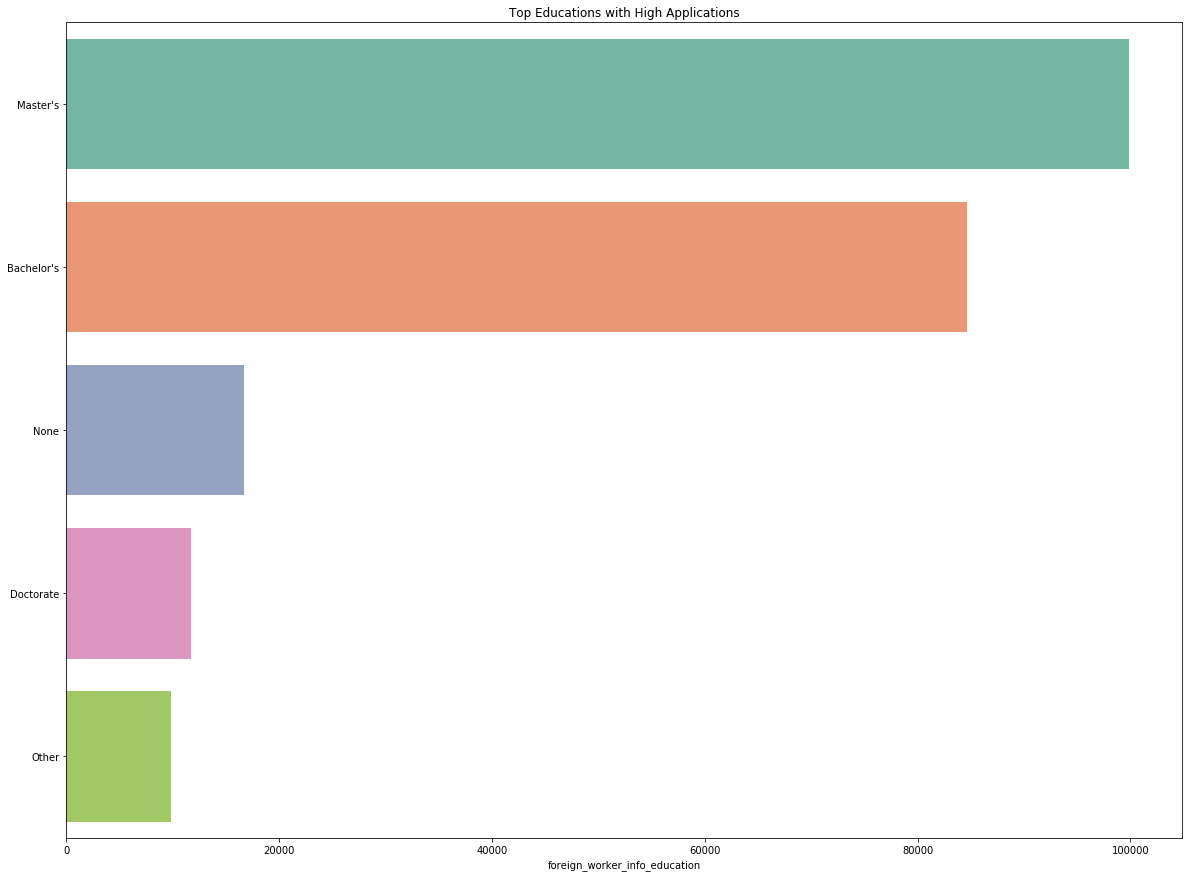

In [26]:
plt.subplots(figsize=(20,15))
ax = sns.barplot(x=data['foreign_worker_info_education'].value_counts()[:5], y=data['foreign_worker_info_education'].value_counts()[:5].index, palette="Set2")
ax.set_title("Top Educations with High Applications")

Text(0.5,1,'Top Educations with High Applications')

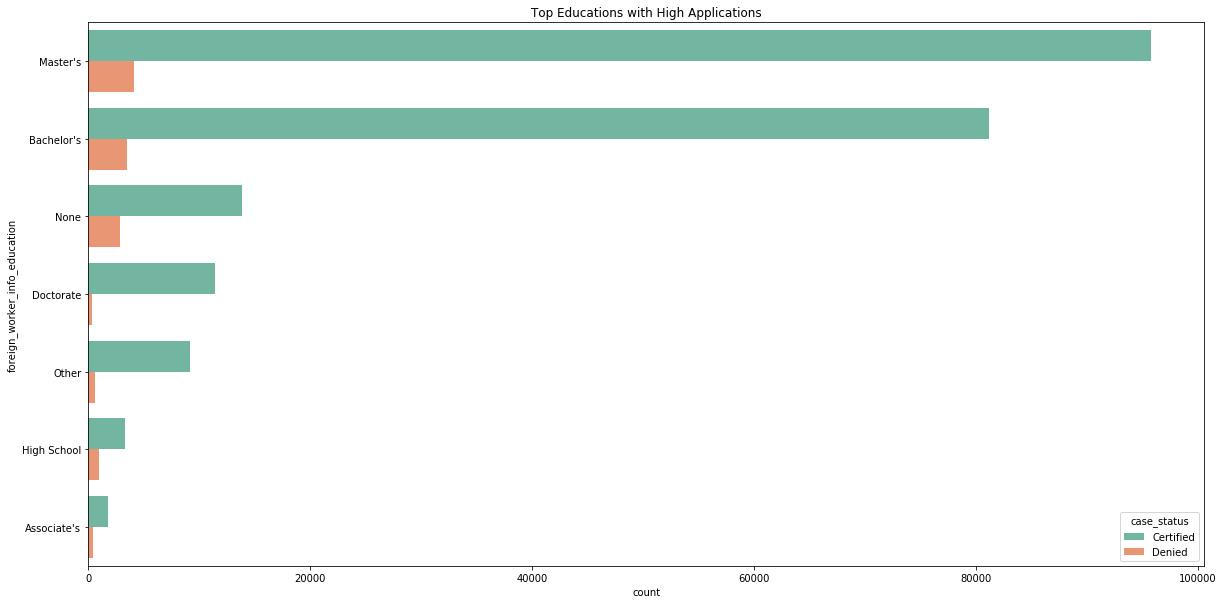

In [28]:
plt.subplots(figsize=(20,10))
ax = sns.countplot(y="foreign_worker_info_education", data=data, hue="case_status", order=data["foreign_worker_info_education"].value_counts().iloc[:10].index, palette="Set2")
ax.set_title("Top Educations with High Applications")

# 2.11 -- Top 20 Social Job Titles with High Visa Applications

Text(0.5,1,'Top 20 Social Job Titles with High Visa Applications')

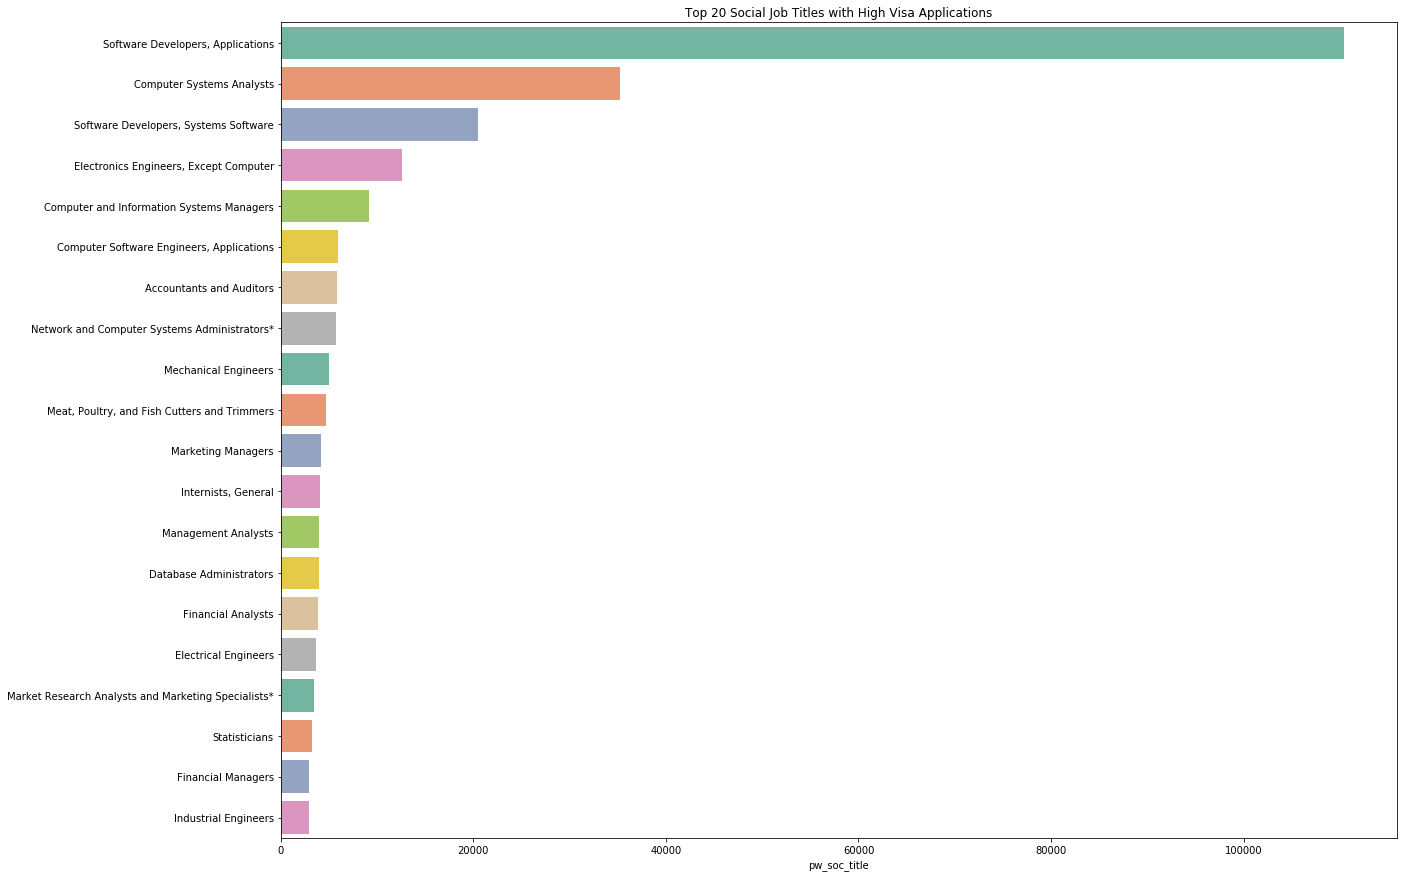

In [30]:
plt.subplots(figsize=(20,15))
ax = sns.barplot(x=data['pw_soc_title'].value_counts()[:20], y=data['pw_soc_title'].value_counts()[:20].index, palette="Set2")
ax.set_title("Top 20 Social Job Titles with High Visa Applications")

Text(0.5,1,'Top 20 Social Job Titles with High Visa Applications')

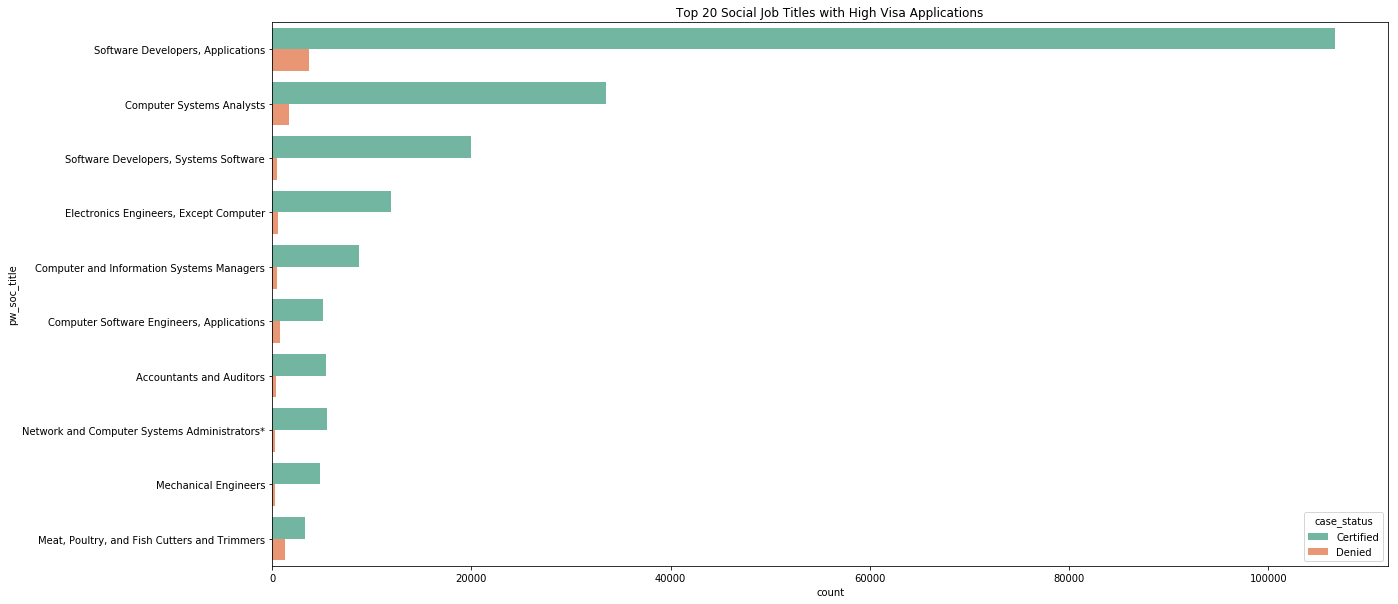

In [29]:
plt.subplots(figsize=(20,10))
ax = sns.countplot(y="pw_soc_title", data=data, hue="case_status", order=data["pw_soc_title"].value_counts().iloc[:10].index, palette="Set2")
ax.set_title("Top 20 Social Job Titles with High Visa Applications")

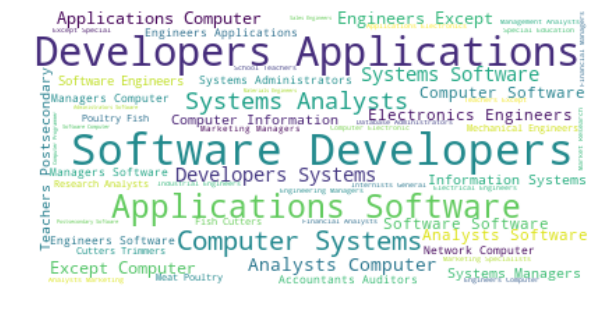

In [66]:
plt.subplots(figsize=(10,8))
text = " ".join(data["pw_soc_title"].dropna().tolist())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()